In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dataset and necessary packages:

In [ ]:
import pandas as pd

data =pd.read_csv("drive/My Drive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


Prepping dataset to apply sampling technique:

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transaction: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transaction: 284315


In [ ]:
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


Applying oversampling technique and splitting into test and train:

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)


Random Forest Classifier:

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used in Random Forest Classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))


The model used in Random Forest Classifier
The accuracy is 0.9999560346798445
The precision is 0.9999122514522385
The recall is 1.0
The F1-Score is 0.9999561238010829


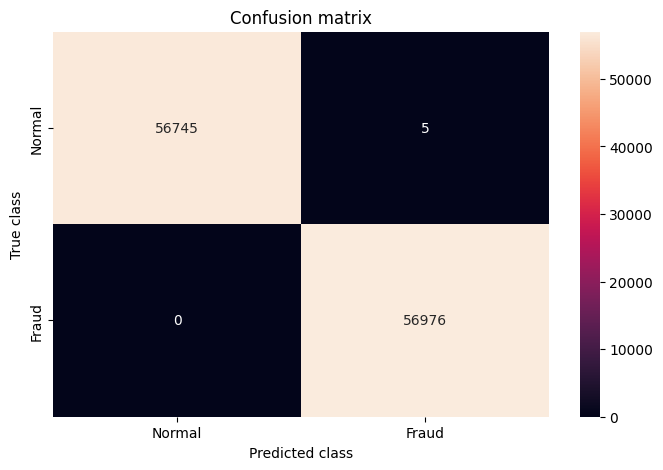

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

K-Nearest Neighbor Classifier:

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn=knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
n_outliers = len(fraud)
n_errors = (knn_pred != y_test).sum()
print("The model used is KNN")

acc = accuracy_score(y_test, knn_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, knn_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, knn_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, knn_pred)
print("The F1-Score is {}".format(f1))

The model used is KNN
The accuracy is 0.9996746566308495
The precision is 0.9993510252047778
The recall is 1.0
The F1-Score is 0.9996754072761407


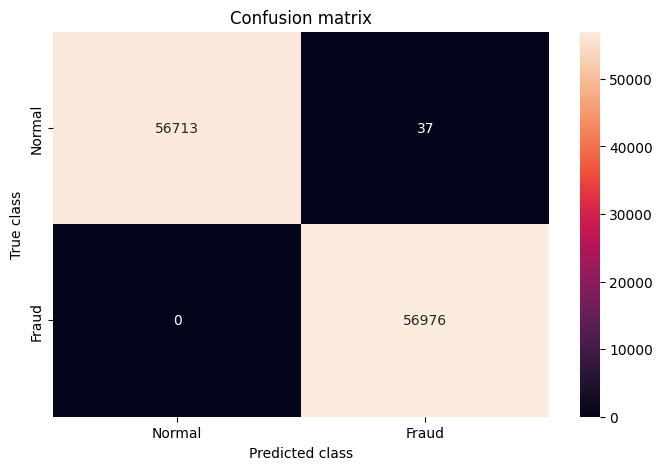

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Naive Bayes Classifier:

In [ ]:
nb_model = GaussianNB()
nb=nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [ ]:
n_outliers = len(fraud)
n_errors = (nb_pred != y_test).sum()
print("The model used is Naive Bayes")

acc = accuracy_score(y_test, nb_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, nb_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, nb_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, nb_pred)
print("The F1-Score is {}".format(f1))

The model used is Naive Bayes
The accuracy is 0.9152084835481772
The precision is 0.9699930493496177
The recall is 0.8572732378545352
The F1-Score is 0.9101564319721237


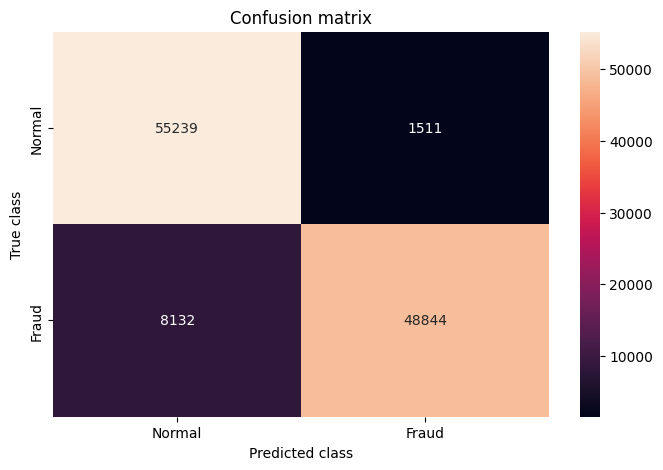

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Comparing models:

In [ ]:
models = [rfc, nb, knn]

for i in range(4):
    models[i] = models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict(X_test)))
    print()

RandomForestClassifier(random_state=42) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9999559471365639

GaussianNB() : 
Training Accuracy :  0.9171057381636623
Validation Accuracy :  0.916973521272424

KNeighborsClassifier(n_neighbors=3) : 


KeyboardInterrupt: ignored

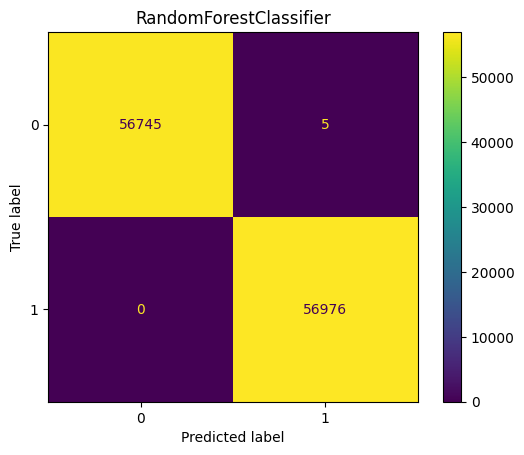

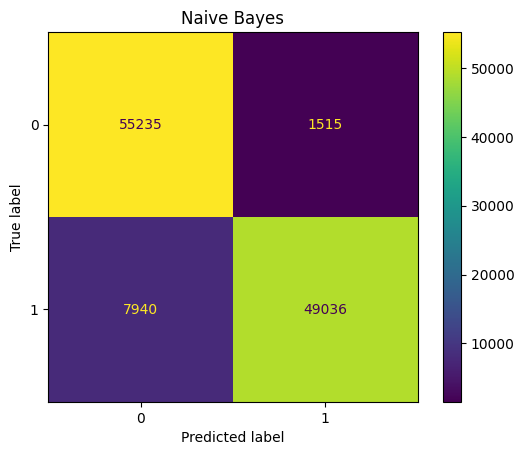

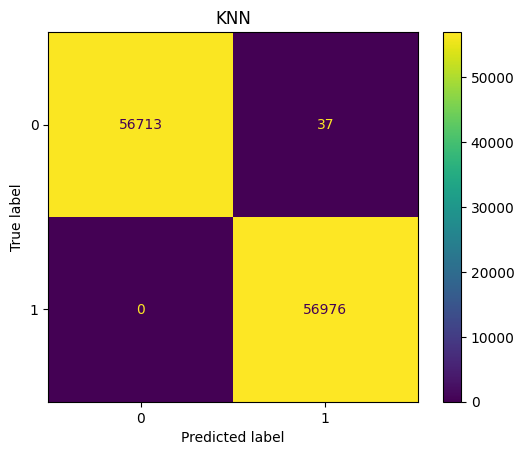

IndexError: ignored

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

model_names = ['RandomForestClassifier', 'Naive Bayes', 'KNN']
for i in range(4):
    ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test)
    plt.title(model_names[i])
    plt.show()


In [ ]:
model_names = ['RandomForestClassifier','Naive Bayes', 'KNN']
#models = [rfc, LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(4):
    print('------', model_names[i], '------')
    print(metrics.classification_report(y_test, models[i].predict(X_test)))

------ RandomForestClassifier ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

------ Naive Bayes ------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56750
           1       0.97      0.86      0.91     56976

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726

------ KNN ------


KeyboardInterrupt: ignored